<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [30]:
import pandas as pd

Load the dataset into a dataframe.


In [31]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


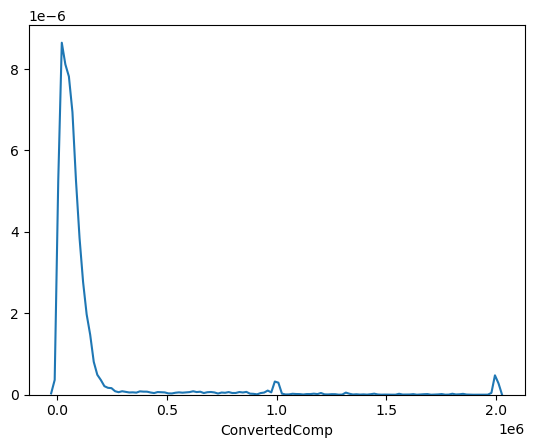

In [33]:
# your code goes here
import seaborn as sns
sns.distplot(df ['ConvertedComp'].dropna(),hist=False)
df['ConvertedComp'].fillna(df['ConvertedComp'].mean(), inplace=True)

Plot the histogram for the column `ConvertedComp`.


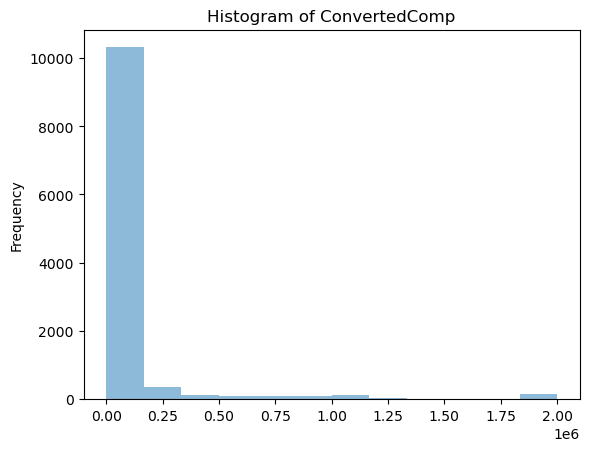

In [71]:
# your code goes here
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram of ConvertedComp') # add a title to the histogram
plt.show()

What is the median of the column `ConvertedComp`?


In [39]:
# your code goes here
df['ConvertedComp'].median()

63016.0

How many responders identified themselves only as a **Man**?


In [29]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [44]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
print("The Median ConvertedComp of responders identified as a Woman is:")

df_woman['ConvertedComp'].median()

The Median ConvertedComp of responders identified as a Woman is:


61071.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [46]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


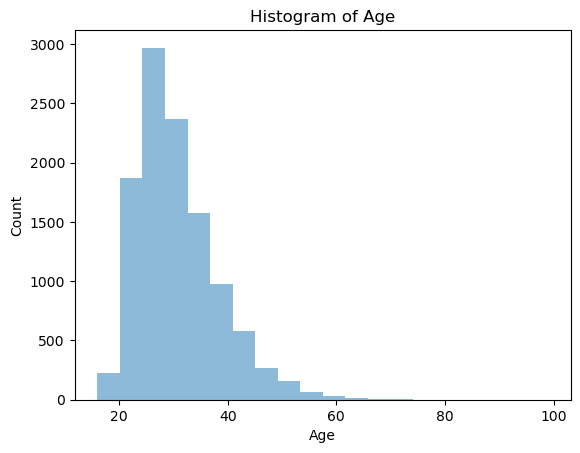

In [69]:
# your code goes here
df['Age'].plot.hist(bins=20, alpha=0.5)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


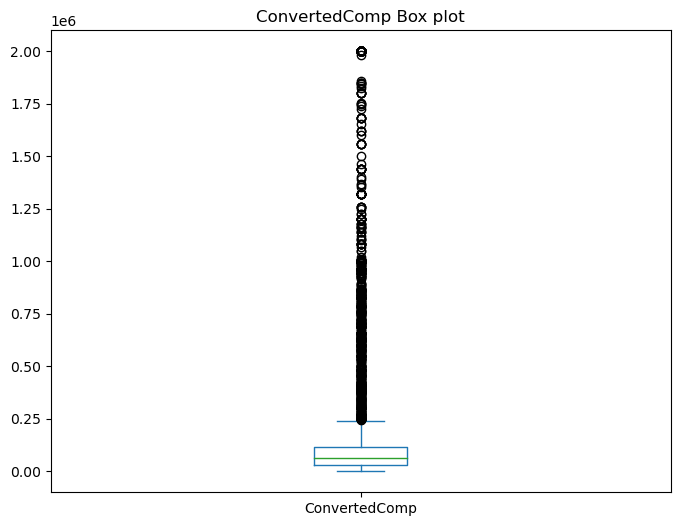

In [74]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(8,6))
plt.title('ConvertedComp Box plot')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [64]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

86448.0

Find out the upper and lower bounds.


In [77]:
# your code goes here
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print(min_val)
print(max_val)

0.0
2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [79]:
# your code goes here
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Outliers above:',df['ConvertedComp'].gt(Q3 + 1.5*IQR).sum())
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean())

Outliers below: 0
Outliers above: 811
Median with outliers: 63016.0
Median with outliers removed: 57828.0
Mean with outliers removed: 66462.39312380234


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [126]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper, lower)
df2.describe()

count     10587.000000
mean      66462.393124
std       47453.710082
min           0.000000
25%       26874.000000
50%       57828.000000
75%      100000.000000
max      241112.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [127]:
# your code goes here
df.corr()['Age']

Respondent       0.001598
CompTotal        0.006483
ConvertedComp    0.337416
WorkWeekHrs      0.037834
CodeRevHrs      -0.018899
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
